## Generalized BALANCE algorithm

In [1]:
from math import e

Calculate psi

- x: A has bid x for this query
- f: Fraction f of the budget of A is currently unspent

In [2]:
psi = lambda x, f: x * (1 - e ** (-f))

xs = [1, 2, 3]
fs = [0.9, 0.5, 0.6]

In [3]:
print "If a query arrives that is bidded on by A and B"
for i in [0, 1]:
    print psi(xs[i], fs[i])

print "If a query arrives that is bidded on by A and C"
for i in [0, 2]:
    print psi(xs[i], fs[i])

print "If a query arrives that is bidded on by A and B and C"
for i in [0, 1, 2]:
    print psi(xs[i], fs[i])

If a query arrives that is bidded on by A and B
0.593430340259
0.786938680575
If a query arrives that is bidded on by A and C
0.593430340259
1.35356509172
If a query arrives that is bidded on by A and B and C
0.593430340259
0.786938680575
1.35356509172


## Bloom Filter

In [4]:
import math

Flagolet-Martin algorithm

In [5]:
# return 3x + 7
def hash(x):
    return (3 * x + 7) % 11

In [6]:
for i in range(1, 11):
    print bin(hash(i))[2:]

1010
10
101
1000
0
11
110
1001
1
100


In [7]:
# asymptotic
fp = lambda k, m, n: (1.0 - math.e ** (-1.0 * k * m / n)) ** k
print fp(2, 3, 10)

0.203570939724


In [8]:
# tiny bloom filter
fp = lambda k, m, n: (1.0 - (1.0 - (1.0 / n)) ** (k * m)) ** k
print fp(2, 3, 10)

0.219547536481


## Flajolet-Martin

In [9]:
# Decimal number to binary number
def dec2bin(dec):
    return bin(dec)[2:]

In [10]:
# Count the number of trailing zeros
def counttrailingzero(b):
    cnt = 0
    for i in range(len(b))[::-1]:
        if b[i] == '0':
            cnt += 1
        else:
            return cnt
    return cnt

In [11]:
# Given R = max r(a), estimate number of distinct elements
def distinctelements(r):
    return 2 ** r

In [12]:
print counttrailingzero(dec2bin(10))
print counttrailingzero(dec2bin(12))
print counttrailingzero(dec2bin(4))
print counttrailingzero(dec2bin(16))
print counttrailingzero(dec2bin(1))

1
2
2
4
0


## Hits algorithm

In [13]:
import numpy as np
from copy import deepcopy

Generate adjacency list from nodes and edges
```
>>> nodes = ['yahoo', 'amazon', 'microsoft']
>>> edges = [('yahoo', 'yahoo'), ('yahoo', 'microsoft'), ('yahoo', 'amazon'), ('amazon', 'microsoft'), ('amazon', 'yahoo'), ('microsoft', 'amazon')]
>>> getAdjList(nodes, edges)
{0: [0, 2, 1], 1: [2, 0], 2: [1]}
```

In [14]:
def getAdjList(nodes, edges):
    nodeMap = {nodes[i] : i for i in range(len(nodes))}
    adjList = {i : [] for i in range(len(nodes))}
    for u, v in edges:
        adjList[nodeMap[u]].append(nodeMap[v])
    return adjList

Genereate A from adjacency list
```
>>> adjList = {0: [0, 2, 1], 1: [2, 0], 2: [1]}
>>> A = getA(adjList)
```

In [15]:
def getA(adjList):
    N = len(adjList)
    A = np.zeros([N, N])
    for u in adjList:
        vs = adjList[u]
        for v in vs:
            A[u, v] = 1
    return A

Hits algorithm
```
>>> adjList = {0: [0, 2, 1], 1: [2, 0], 2: [1]}
>>> A = getA(adjList)
>>> hits(A)
(array([ 0.78875329,  0.57713655,  0.21161674]), array([ 0.62790075,  0.45987097,  0.62790075]))
```

In [16]:
def hits(A, epsilon=10**-6, numiter=1000):
    # initialize
    AT = A.T
    N = len(A)
    aold = np.ones(N) * 1.0 / np.sqrt(N)
    hold = np.ones(N) * 1.0 / np.sqrt(N)
    for i in range(numiter):
        hnew = A.dot(aold)
        anew = AT.dot(hnew)
        hnew *= np.sqrt(1.0 / sum([v * v for v in hnew]))
        anew *= np.sqrt(1.0 / sum([v * v for v in anew]))
        if np.sum([v * v for v in anew - aold]) < epsilon or \
                np.sum([v * v for v in hnew - hold]) < epsilon:
            break
        hold = hnew
        aold = anew
    return hnew, anew

In [17]:
def main():
    adjList = {0: [0, 2, 1], 1: [2, 0], 2: [1]}
    A = getA(adjList)
    print hits(A)

In [18]:
if __name__ == '__main__':
    main()
    import doctest
    doctest.testmod()

(array([ 0.78875329,  0.57713655,  0.21161674]), array([ 0.62790075,  0.45987097,  0.62790075]))


## LSH Plot

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Helper functions

In [20]:
andor = lambda x, r, b: 1 - (1 - x ** r) ** b
orand = lambda x, r, b: (1 - (1 - x) ** b) ** r
cascade = lambda x, r, b: orand(andor(x, r, b), r, b)

In [21]:
print andor(0.2, 3, 4)

0.031618043904


In [27]:
def plot():
    # Variable Initialization
    k = 2 
    r = k ** 2
    b = k ** 2

    # AND-OR Construction
    x1 = np.arange(0, 1, 0.01)
    y1 =  andor(x1, r, b)

    # OR-AND Construction
    x2 = np.arange(0, 1, 0.01)
    y2 = orand(x2, r, b)

    # Cascade Construction
    x3 = np.arange(0, 1, 0.01)
    y3 = cascade(x3, k, k)

    # Show plot
    plt.plot(x1, y1, '-r', x2, y2, '-g', x3, y3, '-b')
    plt.grid(True)
    plt.legend(('and-or', 'or-and', 'cascade'))
    #plt.savefig('lsh.pdf')

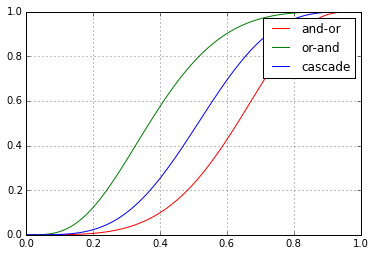

In [28]:
plot()

## Min-hashing algorithm

In [29]:
import numpy as np

In [30]:
class MinHashing:
    def __init__(self, mat, hashfunc):
        self.matrix = mat
        self.m = len(mat)
        self.n = len(mat[0])
        self.hashfunc = hashfunc
        self.k = len(self.hashfunc)
    def minhash(self):
        self.sig = np.ones((self.k, self.n)) * 2 ** 10
        for j in range(self.m):
            for c in range(self.n):
                if self.matrix[j][c] == 1:
                    for i in range(self.k):
                        if self.hashfunc[i](j) < self.sig[i][c]:
                            self.sig[i][c] = self.hashfunc[i](j)
    def show(self):
        print self.sig

In [31]:
if __name__ == '__main__':
    hashfunc = [lambda x: (3 * x + 2) % 7, lambda x: (x - 1) % 7]
    mat = [[0,1],[1,0],[0,1],[0,0],[1,1],[1,1],[1,0]]
    mh = MinHashing(mat, hashfunc)
    mh.minhash()
    mh.show()

    # 2009 final
    mat = [[0,0,1],[1,1,1],[0,1,1],[1,0,0],[0,1,0]]
    hashfunc = [lambda x: x + 1, lambda x: (x - 1) % 5 + 1, lambda x: (x - 2) % 5 + 1, lambda x : (x - 3) % 5 + 1, lambda x: (x - 4) % 5 + 1]
    mh = MinHashing(mat, hashfunc)
    mh.minhash()
    mh.show()

[[ 0.  0.]
 [ 0.  1.]]
[[ 2.  2.  1.]
 [ 1.  1.  1.]
 [ 2.  1.  1.]
 [ 1.  2.  3.]
 [ 3.  1.  2.]]


## PageRank algorithm

In [32]:
import numpy as np
from copy import deepcopy

Generate adjacency list from nodes and edges

In [33]:
def getAdjList(nodes, edges):
    nodeMap = {nodes[i] : i for i in range(len(nodes))}
    adjList = {i : [] for i in range(len(nodes))}
    for u, v in edges:
        adjList[nodeMap[u]].append(nodeMap[v])
    return adjList

Generate M from adjacency list

In [34]:
def getM(adjList):
    size = len(adjList)
    M = np.zeros([size, size])
    for u in adjList:
        vs = adjList[u]
        n = len(vs)
        for v in vs:
            M[v, u] = 1.0 / n
    return M

PageRank
```
nodes = ['y', 'a', 'm']
edges = [('y', 'y'), ('a', 'm'), ('m', 'm'), ('a', 'y'), ('y', 'a')]
adjList = getAdjList(nodes, edges)
M = getM(adjList)
print pageRank(M, 0.8)
```

In [35]:
def pageRank(M, beta=0.8, epsilon=10**-6, numiter=1000):
    N = len(M)
    const = np.ones(N) * (1 - beta) / N
    rold = np.ones(N) * 1.0 / N
    rnew = np.zeros(N)
    for i in range(numiter):
        rnew = beta * M.dot(rold)
        rnew += const
        if np.sum(np.abs(rold - rnew)) < epsilon:
            break
        rold = rnew
    return rnew

Topic-specific pagerank
```
>>> nodes = [1, 2, 3, 4]
>>> edges = [(1, 2), (1, 3), (3, 4), (4, 3), (2, 1)]
>>> adjList = getAdjList(nodes, edges)
>>> M = getM(adjList)
>>> print topicSpecific(M, {0: 1}, 0.8)
>>> print topicSpecific(M, {0: 1}, 0.9)
>>> print topicSpecific(M, {0: 1}, 0.7)
```

In [36]:
def topicSpecific(M, S, beta=0.8, epsilon=10**-6, numiter=1000):
    N = len(M)
    rold = np.ones(N) * 1.0 / N
    const = np.zeros(N)
    for i in S:
        const[i] = (1 - beta) * S[i]
    for i in range(numiter):
        rnew = M.dot(rold) * beta
        rnew += const
        if np.sum(np.abs(rold - rnew)) < epsilon:
            break
        rold = rnew
    return rnew

In [37]:
def main():
    nodes = ['y', 'a', 'm']
    edges = [('y', 'y'), ('a', 'm'), ('m', 'm'), ('a', 'y'), ('y', 'a')]
    adjList = getAdjList(nodes, edges)
    M = getM(adjList)
    print pageRank(M, 0.8)

In [38]:
def test():
    nodes = [1,2,3,4,5,6]
    edges = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 1), (2, 1), (2, 4), (2, 6), (2, 3), (2, 5), (3, 2), (3, 6), (3, 5), (4, 1), (4, 6), (5, 2), (5, 3), (6, 1)]
    adjList = getAdjList(nodes, edges)
    M = getM(adjList)
    print M
    print pageRank(M, 0.8)

In [39]:
if __name__ == '__main__':
    test()

[[ 0.16666667  0.2         0.          0.5         0.          1.        ]
 [ 0.16666667  0.          0.33333333  0.          0.5         0.        ]
 [ 0.16666667  0.2         0.          0.          0.5         0.        ]
 [ 0.16666667  0.2         0.          0.          0.          0.        ]
 [ 0.16666667  0.2         0.33333333  0.          0.          0.        ]
 [ 0.16666667  0.2         0.33333333  0.5         0.          0.        ]]
[ 0.27528617  0.16504385  0.15114541  0.09644519  0.13675066  0.17532873]


## Random hyperplane

In [40]:
from numpy import dot

In [41]:
def rh(x, v):
    return 1 if dot(x, v) >= 0 else -1

In [42]:
a = [1, 0, -2, 1, -3, 0, 0]
b = [2, 0, -3, 0, -2, 0, 2]
c = [1, -1, 0, 1, 2, -2, 1]

x = [1, 1, 1, 1, 1, 1, 1]
y = [-1, 1, -1, 1, -1, 1, -1]
z = [1, 1, 1, -1, -1, -1, -1]

In [43]:
print "a"
print rh(a, x)
print rh(a, y)
print rh(a, z)

a
-1
1
1


In [44]:
print "b"
print rh(b, x)
print rh(b, y)
print rh(b, z)

b
-1
1
-1


In [45]:
print "c"
print rh(c, x)
print rh(c, y)
print rh(c, z)

c
1
-1
-1


Estimate angles

In [46]:
from scipy.spatial.distance import cosine
from numpy import arccos
from numpy import pi

In [47]:
a = [-1, 1, 1]
b = [-1, 1, -1]
c = [1, -1, -1]

In [48]:
print arccos(1 - cosine(a, b)) / pi * 180
print arccos(1 - cosine(b, c)) / pi * 180
print arccos(1 - cosine(c, a)) / pi * 180

70.5287793655
109.471220634
180.0


## Jaccard similarity

In [49]:
from scipy.spatial.distance import jaccard
from scipy.spatial.distance import cosine

In [50]:
def jaccard_sim(u, v):
    return 1 - jaccard(u, v)

In [51]:
def cosine_sim(u, v):
    return 1 - cosine(u, v)

In [52]:
print jaccard_sim([1,0,0,1,1], [0,1,1,1,0])

0.2


In [53]:
print cosine_sim([1,0,1], [0,1,1])

0.5


In [54]:
print cosine_sim([5.22, 1.42], [4.06, 6.39])

0.739026133327
